In [281]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

PLOT IMAGES PRE-SUBSAMPLING

In [282]:
transform = transforms.Compose([transforms.ToTensor()])  # Only convert to tensor

# Download the dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [283]:
#Get 10 random indices within training dataset size
selected_img_idx = np.random.randint(0, 60001, 10)
selected_img_idx

array([11979,   674, 17349, 37819, 37037, 15588,  1221, 46999, 12320,
       19899])

Text(0.5, 0.98, '10 MNIST Images and Labels from Full Training Dataset')

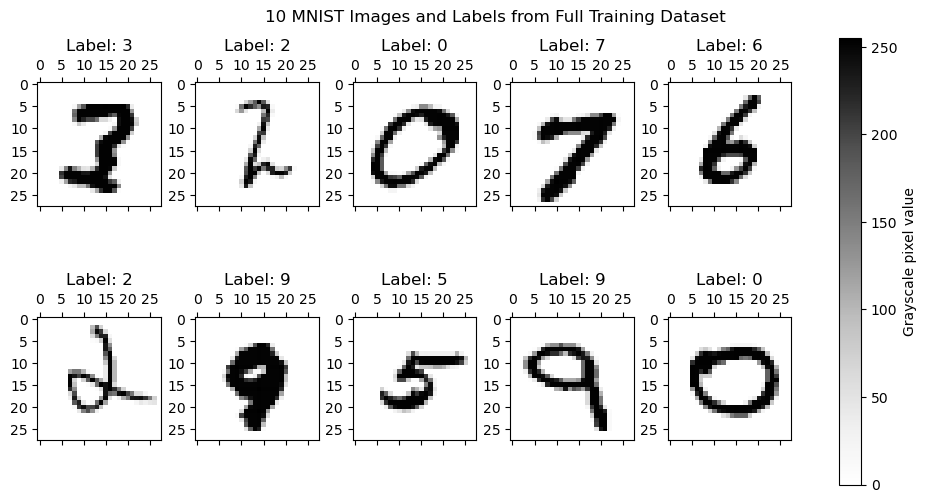

In [284]:
#Plot 10 images and their labels
fig, ax = plt.subplots(2, 5, figsize = [10, 5])
ax = ax.flatten()
for i in range(10):
    im = ax[i].matshow(train_dataset.data[selected_img_idx[i]], cmap = 'Grays', vmin = 0, vmax = 255)
    ax[i].set_title("Label: " + str(train_dataset.targets[selected_img_idx[i]].item()))

plt.tight_layout()

#This line from stackoverflow https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots
fig.colorbar(im, ax=ax.ravel().tolist(), label="Grayscale pixel value")
plt.suptitle("10 MNIST Images and Labels from Full Training Dataset")


PLOT IMAGES POST-SUBSAMPLING

In [285]:
# Function to perform subsampling 50% from each class
def subsample_50_percent_per_class(dataset):
    """
    Subsample 50% of the data from each class.
    dataset: The full dataset 
    Returns: A list of indices for the subsampled dataset
    """
    # --- DONE: Implement subsampling logic here ---

    #Get all labels in dataset
    all_labels = np.array([dataset[i][1] for i in range(dataset.data.shape[0])])

    sampled_indices = []
    #Iterate through classes/labels
    for j in range(10):
        #Find indices where label is a certain value
        idx_array = np.where(all_labels == j)[0]
        #Keep 50 percent of these samples, add to sampled_indices list
        random_idxs_class = np.random.randint(0, len(idx_array), size = int(np.round(len(idx_array)/2)))
        sampled_indices.extend(idx_array[random_idxs_class])

    return sampled_indices

transform = transforms.Compose([transforms.ToTensor()])  # Only convert to tensor

# Download the dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Subsampling: 50% from each class
train_indices = subsample_50_percent_per_class(train_dataset)
train_subset = Subset(train_dataset, train_indices)

test_indices = subsample_50_percent_per_class(test_dataset)
test_subset = Subset(test_dataset, test_indices)

In [286]:
#Select 10 random indices from remaining 30000 subsampled images in training set
selected_img_idx_2 = np.random.randint(0, 30001, 10)
selected_img_idx_2

array([10379, 17505, 26523, 21048, 20780,  4622, 21380,  3334, 25034,
        2007])

Text(0.5, 0.98, '10 MNIST Images and Labels from Normalized Subsampled Training Dataset')

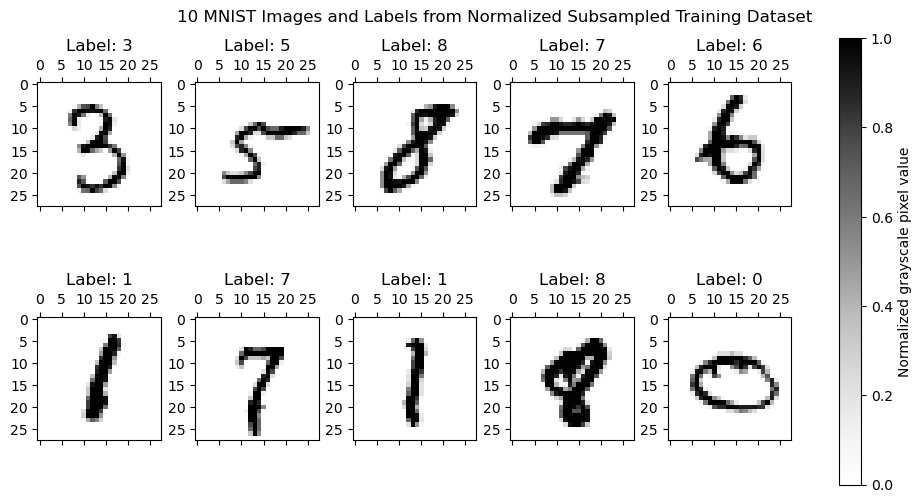

In [287]:
#Plot 10 images
fig, ax = plt.subplots(2, 5, figsize = [10, 5])
ax = ax.flatten()
for i in range(10):
    im = ax[i].matshow(train_subset[selected_img_idx_2[i]][0][0], cmap = 'Grays', vmin = 0, vmax = 1)
    ax[i].set_title("Label: " + str(train_subset[selected_img_idx_2[i]][1]))

plt.tight_layout()

#This line from stackoverflow https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots
fig.colorbar(im, ax=ax.ravel().tolist(), label="Normalized grayscale pixel value")
plt.suptitle("10 MNIST Images and Labels from Normalized Subsampled Training Dataset")